In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
temp = pd.DataFrame({'Max':Max,'Min':Min,'no':[i for i in range(len(Max))]})

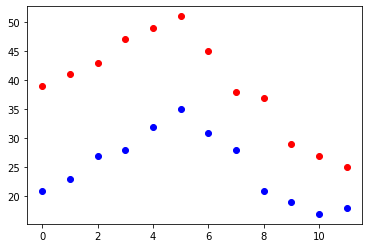

In [3]:
plt.plot(temp['no'],temp['Max'],'ro')
plt.plot(temp['no'],temp['Min'],'bo')

In [4]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, [i for i in range(len(Max))],
                                      Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, [i for i in range(len(Max))],
                                      Min, [-40, 20, 0])

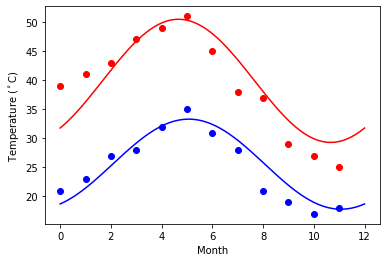

In [5]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot([i for i in range(len(Max))], Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot([i for i in range(len(Max))], Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [6]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

([<matplotlib.patches.Wedge at 0x97d9910>,
 [Text(0.480836864838257, 0.9893411491555963, 'Female'),
  Text(-0.4808369574670582, -0.9893411041363958, 'Male')],
 [Text(0.26227465354814017, 0.5396406268121434, '36%'),
  Text(-0.2622747040729408, -0.5396406022562158, '64%')])

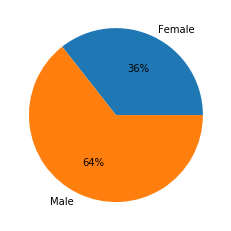

In [7]:
plt.pie(titanic.groupby('sex').count()['pclass'],labels=['Female','Male'],autopct='%1.0f%%')

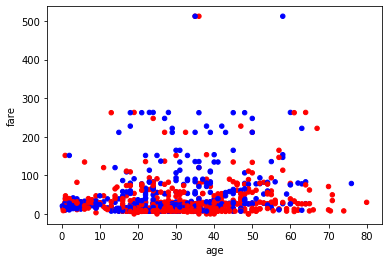

In [8]:
t = list(titanic['sex'])
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l=='male':
            cols.append('red')
        else :
            cols.append('blue')
    return cols
cols = pltcolor(t)
titanic.plot.scatter(x='age',y='fare',c=cols)